## Forecasting House Prices using multiple regression model 

#### Assignment I

#### By Mohammadreza Arabshahi

In [7]:
import pandas as pd
import numpy as np 
import pylab as pl
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [8]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

In [9]:
House_Sales_data = pd.read_excel("C:\\Users\\Mohammad Reza\\Desktop\\Corsera\\Machine Learning-Regression\\W2\\6. Assignments\\1\\kc_house_data.xlsx")

In [10]:
House_Sales_testdata = pd.read_excel("C:\\Users\\Mohammad Reza\\Desktop\\Corsera\\Machine Learning-Regression\\W2\\6. Assignments\\1\\kc_house_test_data.xlsx")
#House_Sales_testdata

In [11]:
House_Sales_trainingdata = pd.read_excel("C:\\Users\\Mohammad Reza\\Desktop\\Corsera\\Machine Learning-Regression\\W2\\6. Assignments\\1\\kc_house_train_data.xlsx")
#House_Sales_trainingdata

## Adding New Features to our test data

In [12]:
House_Sales_testdata['bedrooms_squared'] = House_Sales_testdata['bedrooms'] * House_Sales_testdata['bedrooms']

House_Sales_testdata['bed_bath_rooms'] = House_Sales_testdata['bedrooms'] * House_Sales_testdata['bathrooms']

House_Sales_testdata['log_sqft_living']= np.log(House_Sales_testdata['sqft_living'])

House_Sales_testdata

House_Sales_testdata['lat_plus_long'] =  House_Sales_testdata['lat'] + House_Sales_testdata['long']

House_Sales_testdata


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,bedrooms_squared,bed_bath_rooms,log_sqft_living,lat_plus_long
0,114101516,20140528T000000,310000,3,1.00,1430,19901,1.5,0,0,...,0,98028,47.7558,-122.229,1780,12697,9,3.00,7.265430,-74.4732
1,9297300055,20150124T000000,650000,4,3.00,2950,5000,2.0,0,3,...,0,98126,47.5714,-122.375,2140,4000,16,12.00,7.989560,-74.8036
2,1202000200,20141103T000000,233000,3,2.00,1710,4697,1.5,0,0,...,0,98002,47.3048,-122.218,1030,4705,9,6.00,7.444249,-74.9132
3,8562750320,20141110T000000,580500,3,2.50,2320,3980,2.0,0,0,...,0,98027,47.5391,-122.070,2580,3980,9,7.50,7.749322,-74.5309
4,7589200193,20141110T000000,535000,3,1.00,1090,3000,1.5,0,0,...,0,98117,47.6889,-122.375,1570,5080,9,3.00,6.993933,-74.6861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4224,8672200110,20150317T000000,1088000,5,3.75,4170,8142,2.0,0,2,...,0,98056,47.5354,-122.181,3030,7980,25,18.75,8.335671,-74.6456
4225,5087900040,20141017T000000,350000,4,2.75,2500,5995,2.0,0,0,...,0,98042,47.3749,-122.107,2530,5988,16,11.00,7.824046,-74.7321
4226,3448900210,20141014T000000,610685,4,2.50,2520,6023,2.0,0,0,...,0,98056,47.5137,-122.167,2520,6023,16,10.00,7.832014,-74.6533
4227,6600060120,20150223T000000,400000,4,2.50,2310,5813,2.0,0,0,...,0,98146,47.5107,-122.362,1830,7200,16,10.00,7.745003,-74.8513


### Adding new features to training data

In [ ]:
House_Sales_trainingdata['bedrooms_squared'] = House_Sales_trainingdata['bedrooms'] * House_Sales_trainingdata['bedrooms']

House_Sales_trainingdata['bed_bath_rooms'] = House_Sales_trainingdata['bedrooms'] * House_Sales_trainingdata['bathrooms']

House_Sales_trainingdata['log_sqft_living']= np.log(House_Sales_trainingdata['sqft_living'])

House_Sales_trainingdata['lat_plus_long'] =  House_Sales_trainingdata['lat'] + House_Sales_trainingdata['long']

House_Sales_trainingdata

#### Average data

In [ ]:
mean1 = House_Sales_testdata["bedrooms_squared"].mean()
mean2 = House_Sales_testdata["bed_bath_rooms"].mean()
mean3 = House_Sales_testdata["log_sqft_living"].mean()
mean4 = House_Sales_testdata["lat_plus_long"].mean()
print ('bedrooms_squared: ',mean1)
print ('bed_bath_rooms: ',mean2)
print ('log_sqft_living: ',mean3)
print ('lat_plus_long: ',mean4)

### Model 1

In [11]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(House_Sales_trainingdata[['sqft_living','bedrooms','bathrooms','lat','long']])
train_y = np.asanyarray(House_Sales_trainingdata[['price']])
regr.fit(train_x,train_y)
print ('Coefficients:', regr.coef_)
print ('Intercept:', regr.intercept_)

Coefficients: [[ 3.12258646e+02 -5.95865332e+04  1.57067421e+04  6.58619264e+05
  -3.09374351e+05]]
Intercept: [-69075726.79256982]


### Train based on training data for model 1

In [12]:
y_hat1_train = regr.predict(House_Sales_trainingdata[['sqft_living','bedrooms','bathrooms','lat','long']].values)
train_x = np.asanyarray(House_Sales_trainingdata[['sqft_living','bedrooms','bathrooms','lat','long']].values)
train_y = np.asanyarray(House_Sales_trainingdata[['price']].values)
print("Residual sum of Squares: %.2f" % np.mean((y_hat1_train-train_y) ** 2))
print("Variance Score: %.2f" % regr.score(train_x,train_y))

Residual sum of Squares: 55676481997.79
Variance Score: 0.59


### Train based on test data for model 1

In [159]:
y_hat1_test = regr.predict(House_Sales_testdata[['sqft_living','bedrooms','bathrooms','lat','long']].values)
train_x = np.asanyarray(House_Sales_testdata[['sqft_living','bedrooms','bathrooms','lat','long']].values)
train_y = np.asanyarray(House_Sales_testdata[['price']].values)
print("Residual sum of Squares: %.2f" % np.mean((y_hat1_test-train_y) ** 2))
print("Variance Score: %.2f" % regr.score(train_x,train_y))

House_Sales_trainingdata.bedrooms[50]

Residual sum of Squares: 53322409504.73
Variance Score: 0.58


5

### Plot model 1

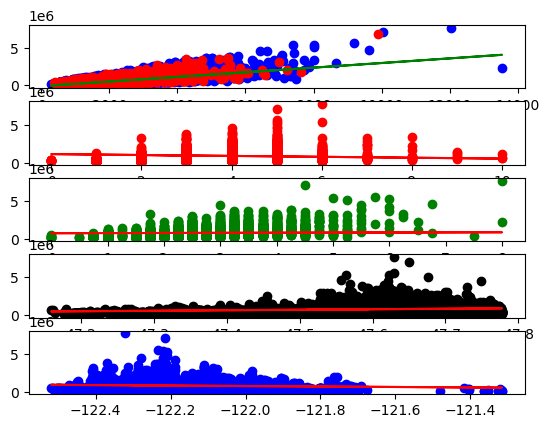

In [14]:
fig = plt.figure()
ax1 = fig.add_subplot(511) 
ax1.scatter(House_Sales_trainingdata.sqft_living, House_Sales_trainingdata.price, color='blue')
ax1.scatter(House_Sales_testdata.sqft_living, House_Sales_testdata.price, color='red')
plt.plot(House_Sales_trainingdata.sqft_living, regr.coef_[0][0]*House_Sales_trainingdata.sqft_living + regr.coef_[0][1]*House_Sales_trainingdata.bedrooms[50] + regr.coef_[0][2]*House_Sales_trainingdata.bathrooms[50] + regr.coef_[0][3]*House_Sales_trainingdata.lat[50] + regr.coef_[0][4]*House_Sales_trainingdata.long[50] + regr.intercept_[0], '-g')

ax2 = fig.add_subplot(512) 
ax2.scatter(House_Sales_trainingdata.bedrooms, House_Sales_trainingdata.price, color='red')
plt.plot(House_Sales_trainingdata.bedrooms, regr.coef_[0][0]*House_Sales_trainingdata.sqft_living[50] + regr.coef_[0][1]*House_Sales_trainingdata.bedrooms + regr.coef_[0][2]*House_Sales_trainingdata.bathrooms[50] + regr.coef_[0][3]*House_Sales_trainingdata.lat[50] + regr.coef_[0][4]*House_Sales_trainingdata.long[50] + regr.intercept_[0], '-r')

ax3 = fig.add_subplot(513) 
ax3.scatter(House_Sales_trainingdata.bathrooms, House_Sales_trainingdata.price, color='green')
plt.plot(House_Sales_trainingdata.bathrooms, regr.coef_[0][0]*House_Sales_trainingdata.sqft_living[50] + regr.coef_[0][1]*House_Sales_trainingdata.bedrooms[50] + regr.coef_[0][2]*House_Sales_trainingdata.bathrooms + regr.coef_[0][3]*House_Sales_trainingdata.lat[50] + regr.coef_[0][4]*House_Sales_trainingdata.long[50] + regr.intercept_[0], '-r')

ax4 = fig.add_subplot(514) 
ax4.scatter(House_Sales_trainingdata.lat, House_Sales_trainingdata.price, color='black')
plt.plot(House_Sales_trainingdata.lat, regr.coef_[0][0]*House_Sales_trainingdata.sqft_living[50] + regr.coef_[0][1]*House_Sales_trainingdata.bedrooms[50] + regr.coef_[0][2]*House_Sales_trainingdata.bathrooms[50] + regr.coef_[0][3]*House_Sales_trainingdata.lat + regr.coef_[0][4]*House_Sales_trainingdata.long[50] + regr.intercept_[0], '-r')

ax5 = fig.add_subplot(515) 
ax5.scatter(House_Sales_trainingdata.long, House_Sales_trainingdata.price, color='blue')
plt.plot(House_Sales_trainingdata.long, regr.coef_[0][0]*House_Sales_trainingdata.sqft_living[50] + regr.coef_[0][1]*House_Sales_trainingdata.bedrooms[50] + regr.coef_[0][2]*House_Sales_trainingdata.bathrooms[50] + regr.coef_[0][3]*House_Sales_trainingdata.lat[50] + regr.coef_[0][4]*House_Sales_trainingdata.long + regr.intercept_[0], '-r')


plt.show()

### Model 2

In [87]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(House_Sales_trainingdata[['sqft_living','bedrooms','bathrooms','lat','long','bed_bath_rooms']])
train_y = np.asanyarray(House_Sales_trainingdata[['price']])
regr.fit(train_x,train_y)
print ('Coefficients:', regr.coef_)
print ('Intercept:', regr.intercept_)

Coefficients: [[ 3.06610053e+02 -1.13446368e+05 -7.14613083e+04  6.54844630e+05
  -2.94298969e+05  2.55796520e+04]]
Intercept: [-66867968.87107886]


### Train based on training data for model 2

In [88]:
y_hat2_train = regr.predict(House_Sales_trainingdata[['sqft_living','bedrooms','bathrooms','lat','long','bed_bath_rooms']].values)
train_x = np.asanyarray(House_Sales_trainingdata[['sqft_living','bedrooms','bathrooms','lat','long','bed_bath_rooms']].values)
train_y = np.asanyarray(House_Sales_trainingdata[['price']].values)
print("Residual sum of Squares: %.2f" % np.mean((y_hat2_train-train_y) ** 2))
print("Variance Score: %.2f" % regr.score(train_x,train_y))

Residual sum of Squares: 55132284576.28
Variance Score: 0.60


### Train based on test data for model 2

In [89]:
y_hat2_test = regr.predict(House_Sales_testdata[['sqft_living','bedrooms','bathrooms','lat','long','bed_bath_rooms']].values)
train_x = np.asanyarray(House_Sales_testdata[['sqft_living','bedrooms','bathrooms','lat','long','bed_bath_rooms']].values)
train_y = np.asanyarray(House_Sales_testdata[['price']].values)
print("Residual sum of Squares: %.2f" % np.mean((y_hat2_test-train_y) ** 2))
print("Variance Score: %.2f" % regr.score(train_x,train_y))

Residual sum of Squares: 52820397960.86
Variance Score: 0.58


## Model 3

In [21]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(House_Sales_trainingdata[['sqft_living','bedrooms','bathrooms','lat','long','bed_bath_rooms','bedrooms_squared','log_sqft_living','lat_plus_long']])
train_y = np.asanyarray(House_Sales_trainingdata[['price']])
regr.fit(train_x,train_y)
print ('Coefficients:', regr.coef_)
print ('Intercept:', regr.intercept_)
regr.coef_[0][8]

Coefficients: [[ 5.29422820e+02  3.45142296e+04  6.70607813e+04  5.34085611e+05
  -4.06750711e+05 -8.57050439e+03 -6.78858667e+03 -5.61831484e+05
   1.27334900e+05]]
Intercept: [-62036084.98609822]


127334.90000645636

### Train based on training data for model 3

In [17]:
y_hat3_train = regr.predict(House_Sales_trainingdata[['sqft_living','bedrooms','bathrooms','lat','long','bed_bath_rooms','bedrooms_squared','log_sqft_living','lat_plus_long']].values)
train_x = np.asanyarray(House_Sales_trainingdata[['sqft_living','bedrooms','bathrooms','lat','long','bed_bath_rooms','bedrooms_squared','log_sqft_living','lat_plus_long']].values)
train_y = np.asanyarray(House_Sales_trainingdata[['price']].values)
print("Residual sum of Squares: %.2f" % np.mean((y_hat3_train-train_y) ** 2))
print("Variance Score: %.2f" % regr.score(train_x,train_y))

Residual sum of Squares: 51969423323.20
Variance Score: 0.62


### Train based on test data for model 3

In [18]:
y_hat3_test = regr.predict(House_Sales_testdata[['sqft_living','bedrooms','bathrooms','lat','long','bed_bath_rooms','bedrooms_squared','log_sqft_living','lat_plus_long']].values)
train_x = np.asanyarray(House_Sales_testdata[['sqft_living','bedrooms','bathrooms','lat','long','bed_bath_rooms','bedrooms_squared','log_sqft_living','lat_plus_long']].values)
train_y = np.asanyarray(House_Sales_testdata[['price']].values)
print("Residual sum of Squares: %.2f" % np.mean((y_hat3_test-train_y) ** 2))
print("Variance Score: %.2f" % regr.score(train_x,train_y))

Residual sum of Squares: 61299673494.25
Variance Score: 0.52


### Plot model 3

 


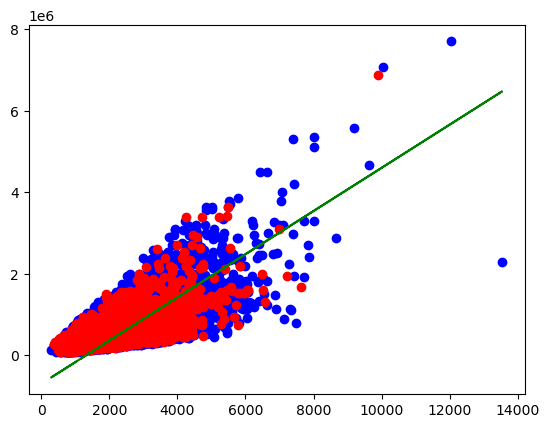

In [26]:
fig = plt.figure()
ax1 = fig.add_subplot(111) 
ax1.scatter(House_Sales_trainingdata.sqft_living, House_Sales_trainingdata.price, color='blue')
ax1.scatter(House_Sales_testdata.sqft_living, House_Sales_testdata.price, color='red')
plt.plot(House_Sales_trainingdata.sqft_living, regr.coef_[0][0]*House_Sales_trainingdata.sqft_living + regr.coef_[0][1]*House_Sales_trainingdata.bedrooms[50] + regr.coef_[0][2]*House_Sales_trainingdata.bathrooms[2] + regr.coef_[0][3]*House_Sales_trainingdata.lat[5] + regr.coef_[0][4]*House_Sales_trainingdata.long[10] + regr.coef_[0][5]*House_Sales_trainingdata.bed_bath_rooms[50] + regr.coef_[0][6]*House_Sales_trainingdata.bedrooms_squared[100] + regr.coef_[0][7]*House_Sales_trainingdata.log_sqft_living[20] + regr.coef_[0][8]*House_Sales_trainingdata.lat_plus_long[50] + regr.intercept_[0], '-g')



plt.show()